##  Columns
Matrix column entries (attributes):
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency


##### Several measures of variation in fundamental frequency
MDVP:Jitter(%)  **||**   MDVP:Jitter(Abs)  **||**  MDVP:RAP **||**   MDVP:PPQ  **||**    Jitter:DDP 

#### Several measures of variation in amplitude
MDVP:Shimmer **||**
MDVP:Shimmer(dB)**||**
Shimmer:APQ3 **||**
Shimmer:APQ5 **||**
MDVP:APQ **||**
Shimmer:DDA **||** 

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
parkinsons_data = parkinsons_data.drop(columns=['name'], axis=1)

In [11]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 23)

In [12]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [13]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [14]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [15]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1 --> Parkinson's Positive

0 --> Healthy

In [16]:
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


<Axes: >

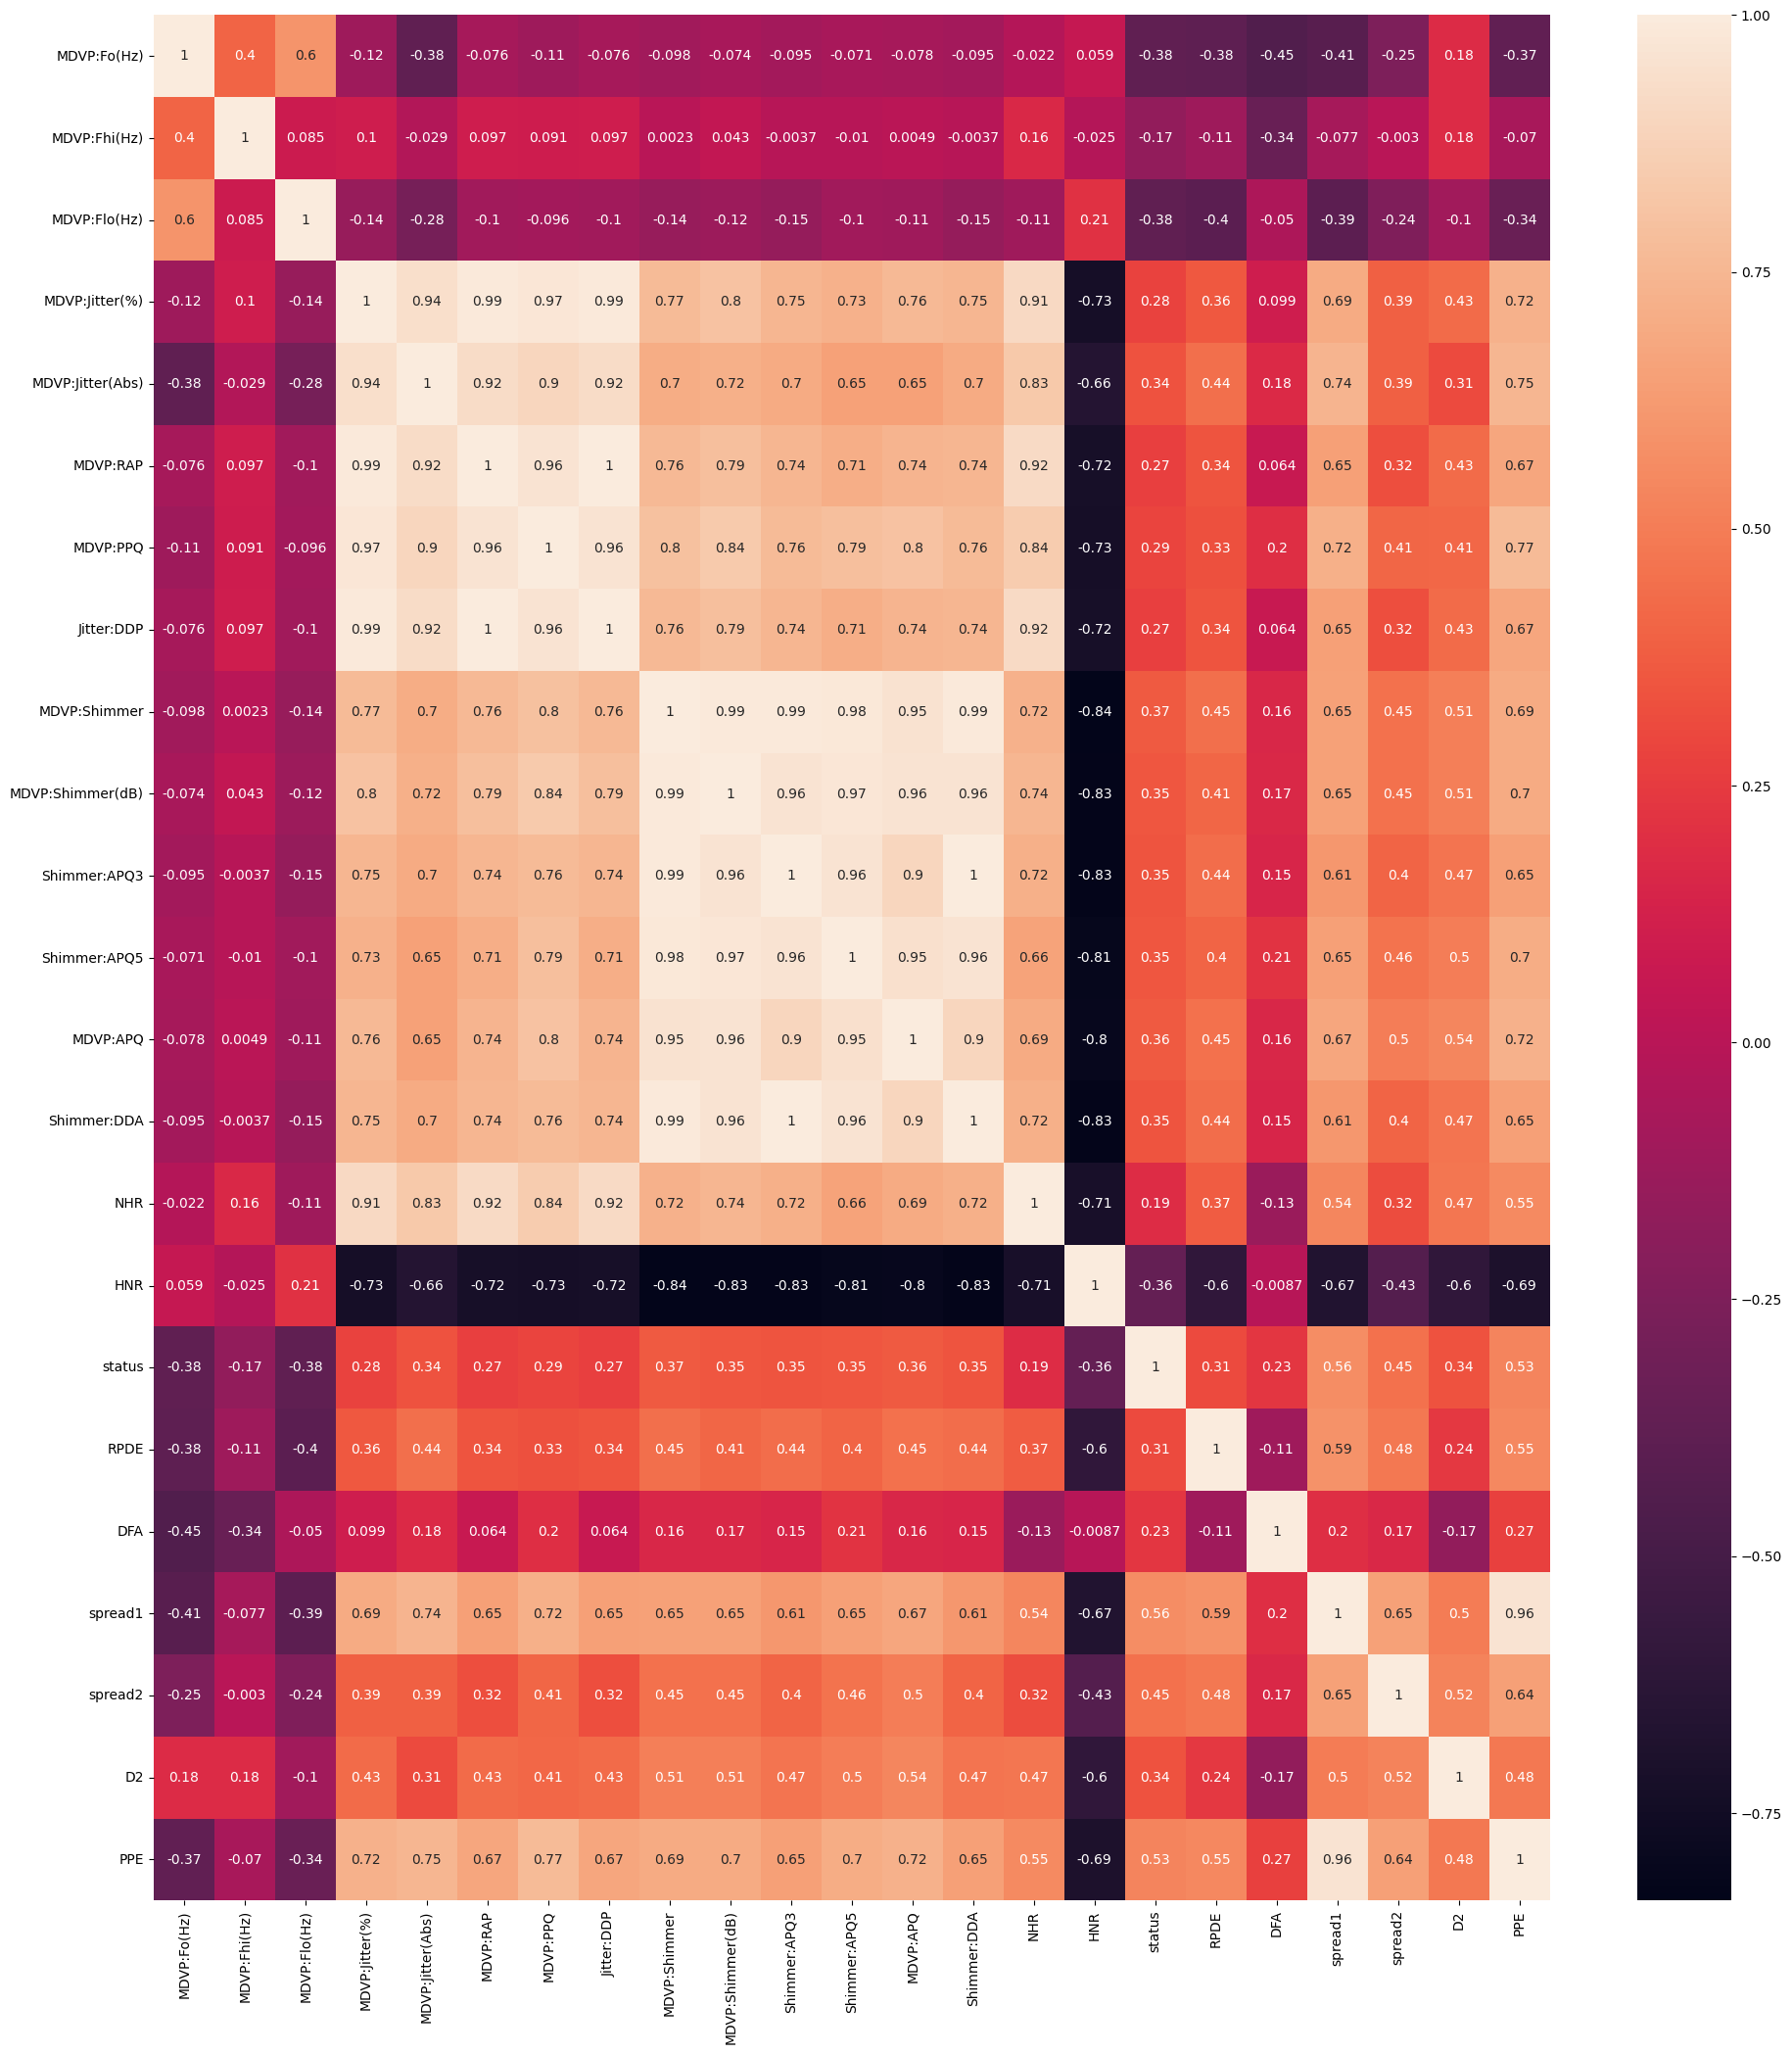

In [20]:
plt.figure(figsize=(23,25))
sns.heatmap(parkinsons_data.corr(),annot=True)

#### Separating the features & Target

In [22]:
X = parkinsons_data.drop(columns=['status'], axis=1)
y = parkinsons_data['status']

In [23]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
sm=SMOTE(random_state=42)

In [90]:
X_sampled,y_sampled=sm.fit_resample(X,y)

Text(0, 0.5, 'counts')

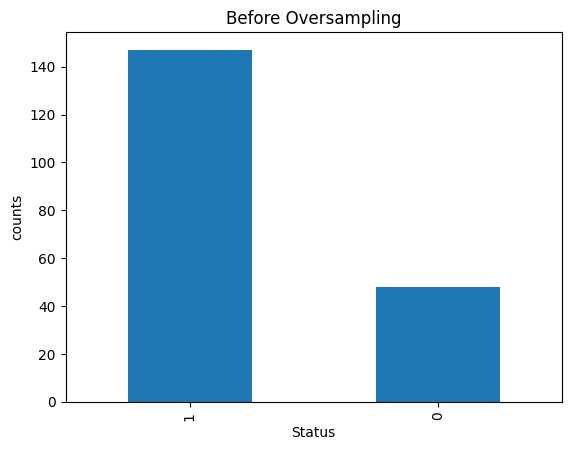

In [91]:
parkinsons_data['status'].value_counts().plot(kind='bar')
plt.title("Before Oversampling")
plt.xlabel('Status')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

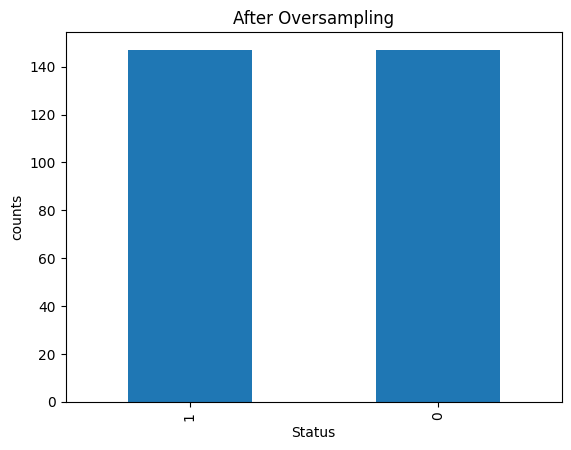

In [92]:
y_sampled.value_counts().plot(kind='bar')
plt.title("After Oversampling")
plt.xlabel('Status')
plt.ylabel('counts')

#### Splitting the data to training data & Test data

In [100]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_sampled,y_sampled, test_size=0.2, random_state=123)

In [101]:
print(X.shape, Xtrain.shape, Xtest.shape)

(195, 22) (235, 22) (59, 22)


#### Data Standardization

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [103]:
scaler.fit(Xtrain)

StandardScaler()

In [104]:
Xtrain = scaler.fit_transform(Xtrain)

Xtest = scaler.transform(Xtest)

### Model Training

#### Support Vector Machine Model & hypertunning

In [105]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import RandomizedSearchCV

In [106]:
svm=SVC(probability=True)
svm.fit(Xtrain,ytrain)
ypred_train=svm.predict(Xtrain)
ypred_test=svm.predict(Xtest)
print(svm)
print("Train Data")
print(classification_report(ytrain,ypred_train))
print("Test Data")
print(classification_report(ytest,ypred_test))

SVC(probability=True)
Train Data
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       118
           1       0.96      0.88      0.92       117

    accuracy                           0.92       235
   macro avg       0.93      0.92      0.92       235
weighted avg       0.93      0.92      0.92       235

Test Data
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.89      0.83      0.86        30

    accuracy                           0.86        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.87      0.86      0.86        59



ROC-AUC for Recall Curve:


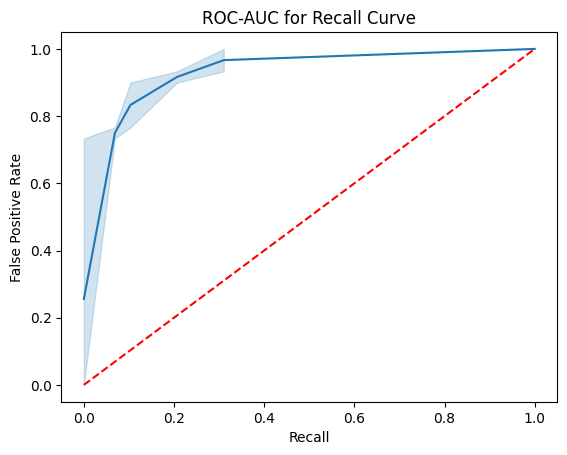

ROC-AUC for Recall: 0.9563218390804598


In [107]:
print("ROC-AUC for Recall Curve:")
ytest_prob = svm.predict_proba(Xtest)
ytest_pred = svm.predict(Xtest)

recall, fpr, thresholds = roc_curve(ytest, ytest_prob[:, 1], pos_label=1)
roc_auc_recall = roc_auc_score(ytest, ytest_prob[:, 1])

sns.lineplot(x=recall, y=fpr)
sns.lineplot(x=[0.0, 1.0], y=[0.0, 1.0], color="red", linestyle="--")
plt.xlabel("Recall")
plt.ylabel("False Positive Rate")
plt.title("ROC-AUC for Recall Curve")
plt.show()

print("ROC-AUC for Recall:", roc_auc_recall)

#### hyperparameter tunning

In [108]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}

In [109]:
svm_cl = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=10, cv=5,n_jobs=-1)
svm_cl.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear']})

In [110]:
print("Best Parameters:", svm_cl.best_params_)
print("Best Score:", svm_cl.best_score_)

Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}
Best Score: 0.8808510638297872


In [111]:
ytrain_predsvm=svm_cl.predict(Xtrain)
ytest_predsvm=svm_cl.predict(Xtest)
ytest_probsvm=svm_cl.predict_proba(Xtest)# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.pkl', 'rb'))

In [112]:
print("Train Data")
print(classification_report(ytrain,ytrain_predsvm))
print("Test Data")
print(classification_report(ytest,ytest_predsvm))


Train Data
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       118
           1       0.92      0.84      0.88       117

    accuracy                           0.89       235
   macro avg       0.89      0.88      0.88       235
weighted avg       0.89      0.89      0.88       235

Test Data
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.81      0.83      0.82        30

    accuracy                           0.81        59
   macro avg       0.81      0.81      0.81        59
weighted avg       0.81      0.81      0.81        59



#### Building a Predictive System

In [113]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = svm.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


In [144]:
input_data = (214.289,
260.277,
77.973,
0.00567,
0.00003,
0.00295,
0.00317,
0.00885,
0.01884,
0.19,
0.01026,
0.01161,
0.01373,
0.03078,
0.04398,
21.209,
0.462803,
0.664357,
-5.724056,
0.190667,
2.555477,
0.148569
)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = svm.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


In [128]:
input_data = (122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = svm.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[1]
The Person has Parkinsons


### Saving the trained model

In [140]:
import pickle

In [141]:
filename = 'parkinsons_disease_model.pkl'
pickle.dump(svm, open(filename, 'wb'))

In [142]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_disease_model.pkl', 'rb'))

In [143]:
for column in X.columns:
    print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE


In [136]:
pickle.dump(scaler,open("scaler_parkinsons.pkl","wb"))

In [137]:
pickle.dump(sm,open("oversampleing_parkinsons.pkl","wb"))